In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text
import matplotlib.tri as tri

from utils import (
    load_poisson2d_kernel_dataset, load_helmholtz2d_kernel_dataset,
    load_poisson2dhdomain_kernel_dataset, load_helmholtz2dhdomain_kernel_dataset)
from utils import relative_err

In [2]:
nTrain = 1000
nTest = 200
idx = 10

In [3]:
import matplotlib.tri as tri

In [5]:
def vis_2D_result(upath, domain, task, idx=10, outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()

    if (task == 'poisson') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'poisson') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'helmholtz') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'helmholtz') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
            '../data', nTrain, nTest)
    
    upred = np.load(upath, allow_pickle=True)
    rl2 = relative_err(upred, uTest)
    print(f"task : {task} - domain : {domain}")
    print("relative L2 : {:.4e}".format(rl2))

    if domain == 'disk':
        meshy_path = os.path.join('../data', 'mesh2D_disk.mat')
    elif domain == 'h':
        meshy_path = os.path.join('../data', 'mesh2D_h.mat')
        
    ys = scipy.io.loadmat(meshy_path)['X']
    tris = scipy.io.loadmat(meshy_path)['Tri']
    triang = tri.Triangulation(ys[:,0],ys[:,1],triangles=tris)

    upred = upred[:,idx].reshape(-1)
    uref = uTest[:,idx].reshape(-1)
    uerr = np.abs(upred - uref)
    vmin = uref.min()
    vmax = uref.max()

    im = ax1.tricontourf(
        triang, uref, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax1.set_aspect('equal')
    ax1.set_title('Reference')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$', rotation=0)
    ax1.set_xticklabels("")
    ax1.set_yticklabels("")
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_a = Text(0.01, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    im = ax2.tricontourf(
        triang, upred, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax2.set_aspect('equal')
    ax2.set_title('Prediction')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$', rotation=0)
    ax2.set_xticklabels("")
    ax2.set_yticklabels("")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_b = Text(0.01, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    im = ax3.tricontourf(
        triang, uerr, levels=30, cmap='jet')
    ax3.set_aspect('equal')
    ax3.set_title('Absolute Error')
    ax3.set_xlabel('$x_1$')
    ax3.set_ylabel('$x_2$', rotation=0)
    ax3.set_xticklabels("")
    ax3.set_yticklabels("")
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_c = Text(0.01, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    plt.savefig(outnm)

Poisson Disk

task : poisson - domain : disk
relative L2 : 2.5461e-04


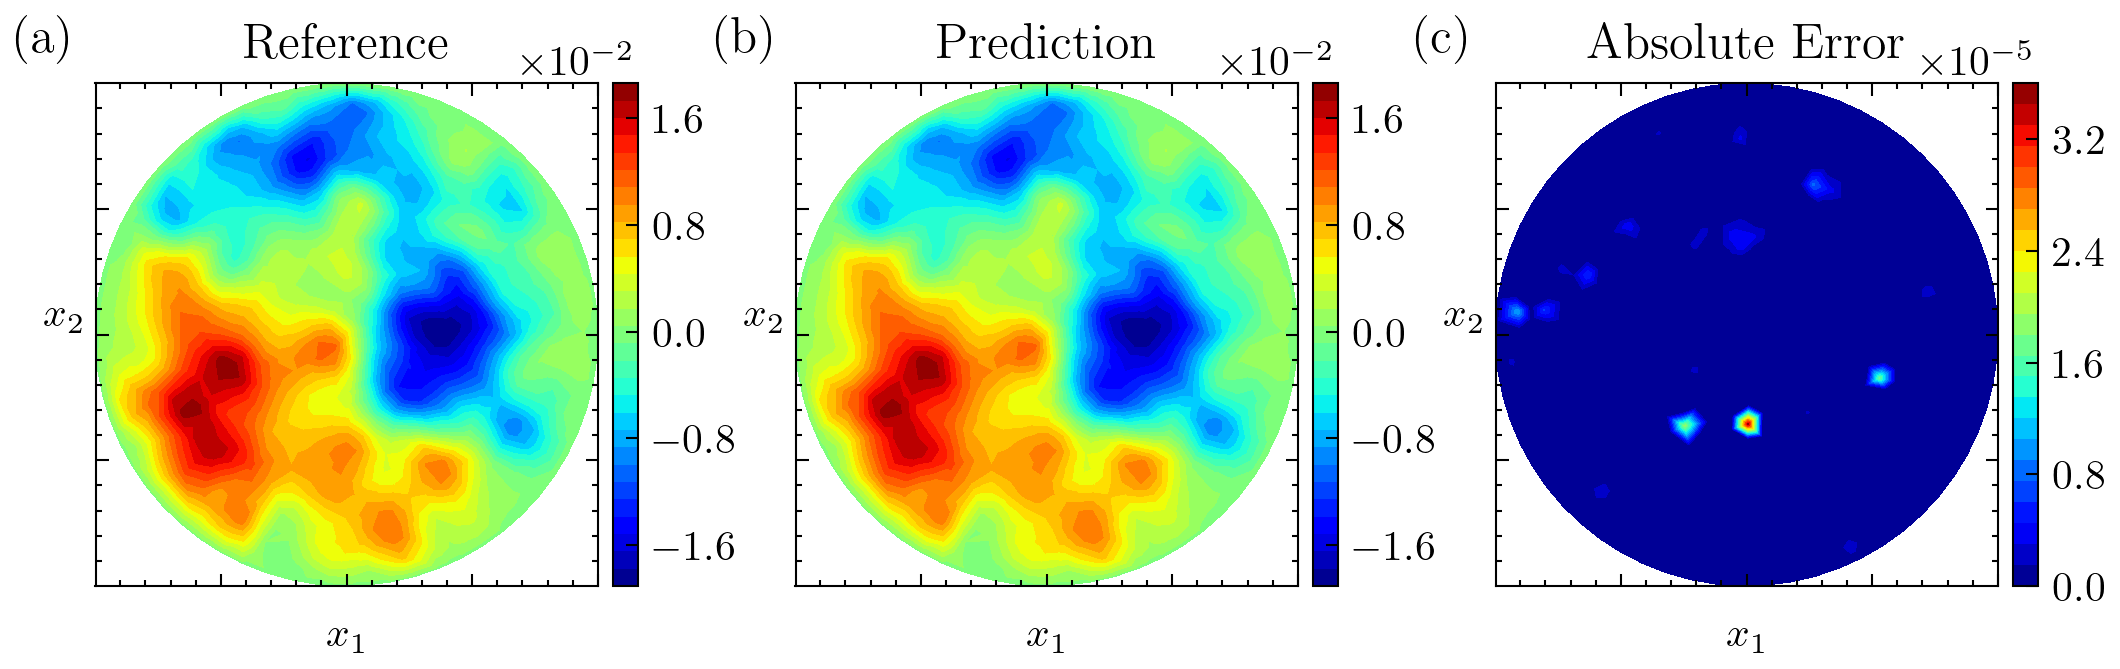

In [6]:
vis_2D_result(
    '../results/poisson2D/oga+-512-1000-relu/upred.npy', 'disk', 'poisson', 10, outnm='poisson2D.pdf')

Helmholtz Disk

task : helmholtz - domain : disk
relative L2 : 1.3953e-04


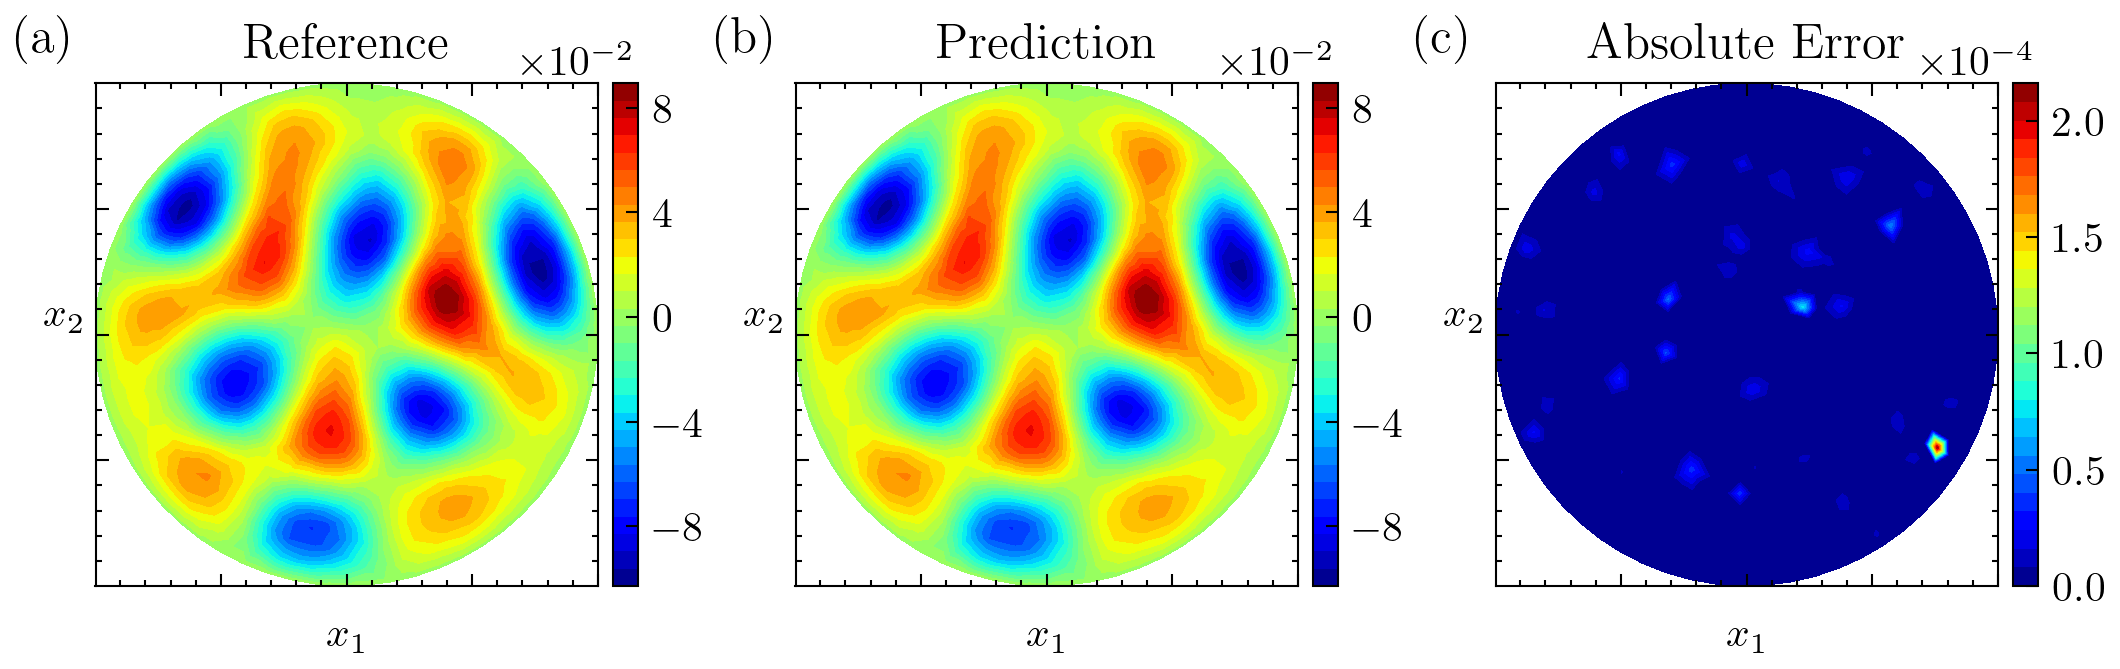

In [7]:
vis_2D_result(
    '../results/helmholtz2D/oga+-512-1000-relu/upred.npy', 'disk', 'helmholtz', 10, outnm='helmholtz2D.pdf')

Poisson H

task : poisson - domain : h
relative L2 : 4.9428e-04


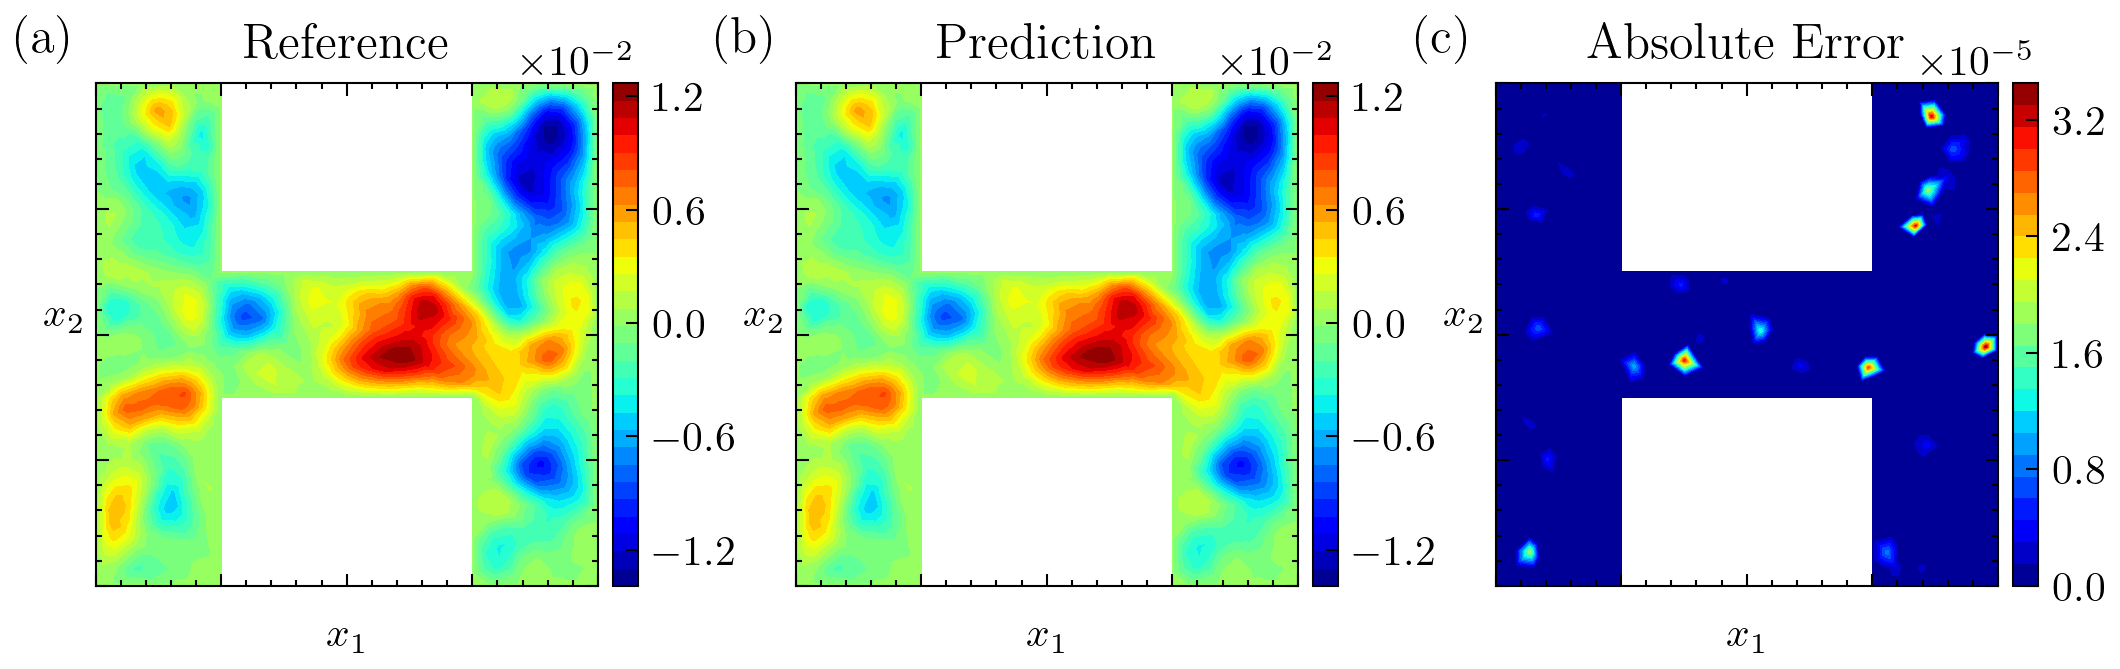

In [8]:
vis_2D_result(
    '../results/poisson2Dhdomain/oga+-512-1000-relu/upred.npy', 'h', 'poisson', idx, outnm='poisson2DH.pdf')

Helmholtz H

task : helmholtz - domain : h
relative L2 : 1.0960e-03


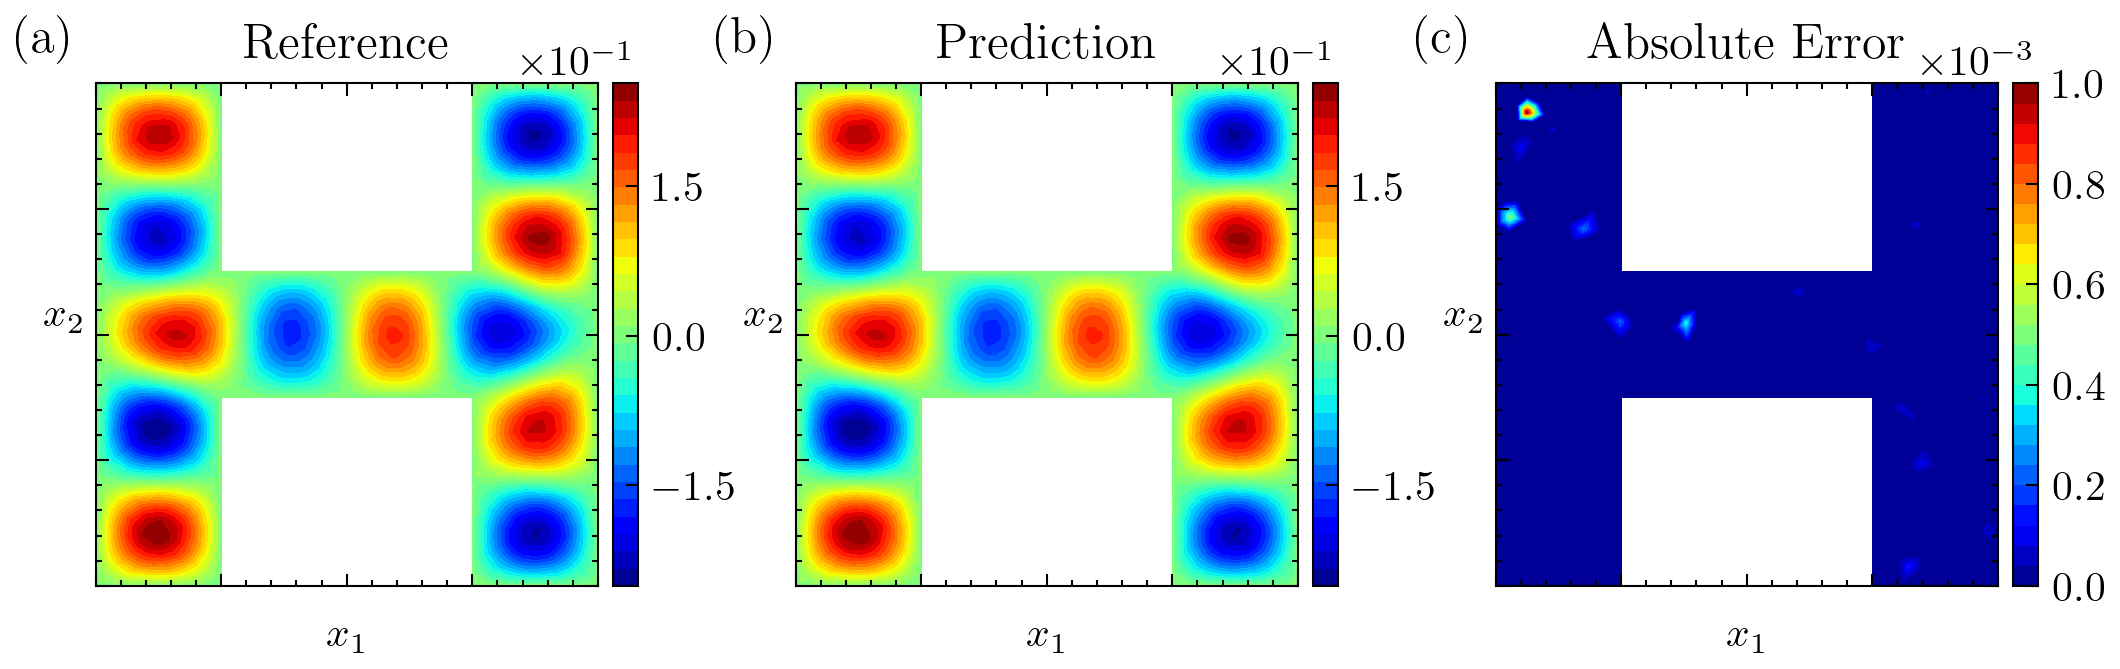

In [9]:
vis_2D_result(
    '../results/helmholtz2Dhdomain/oga+-512-1000-relu/upred.npy', 'h', 'helmholtz', 50, outnm='helmholtz2DH.pdf')

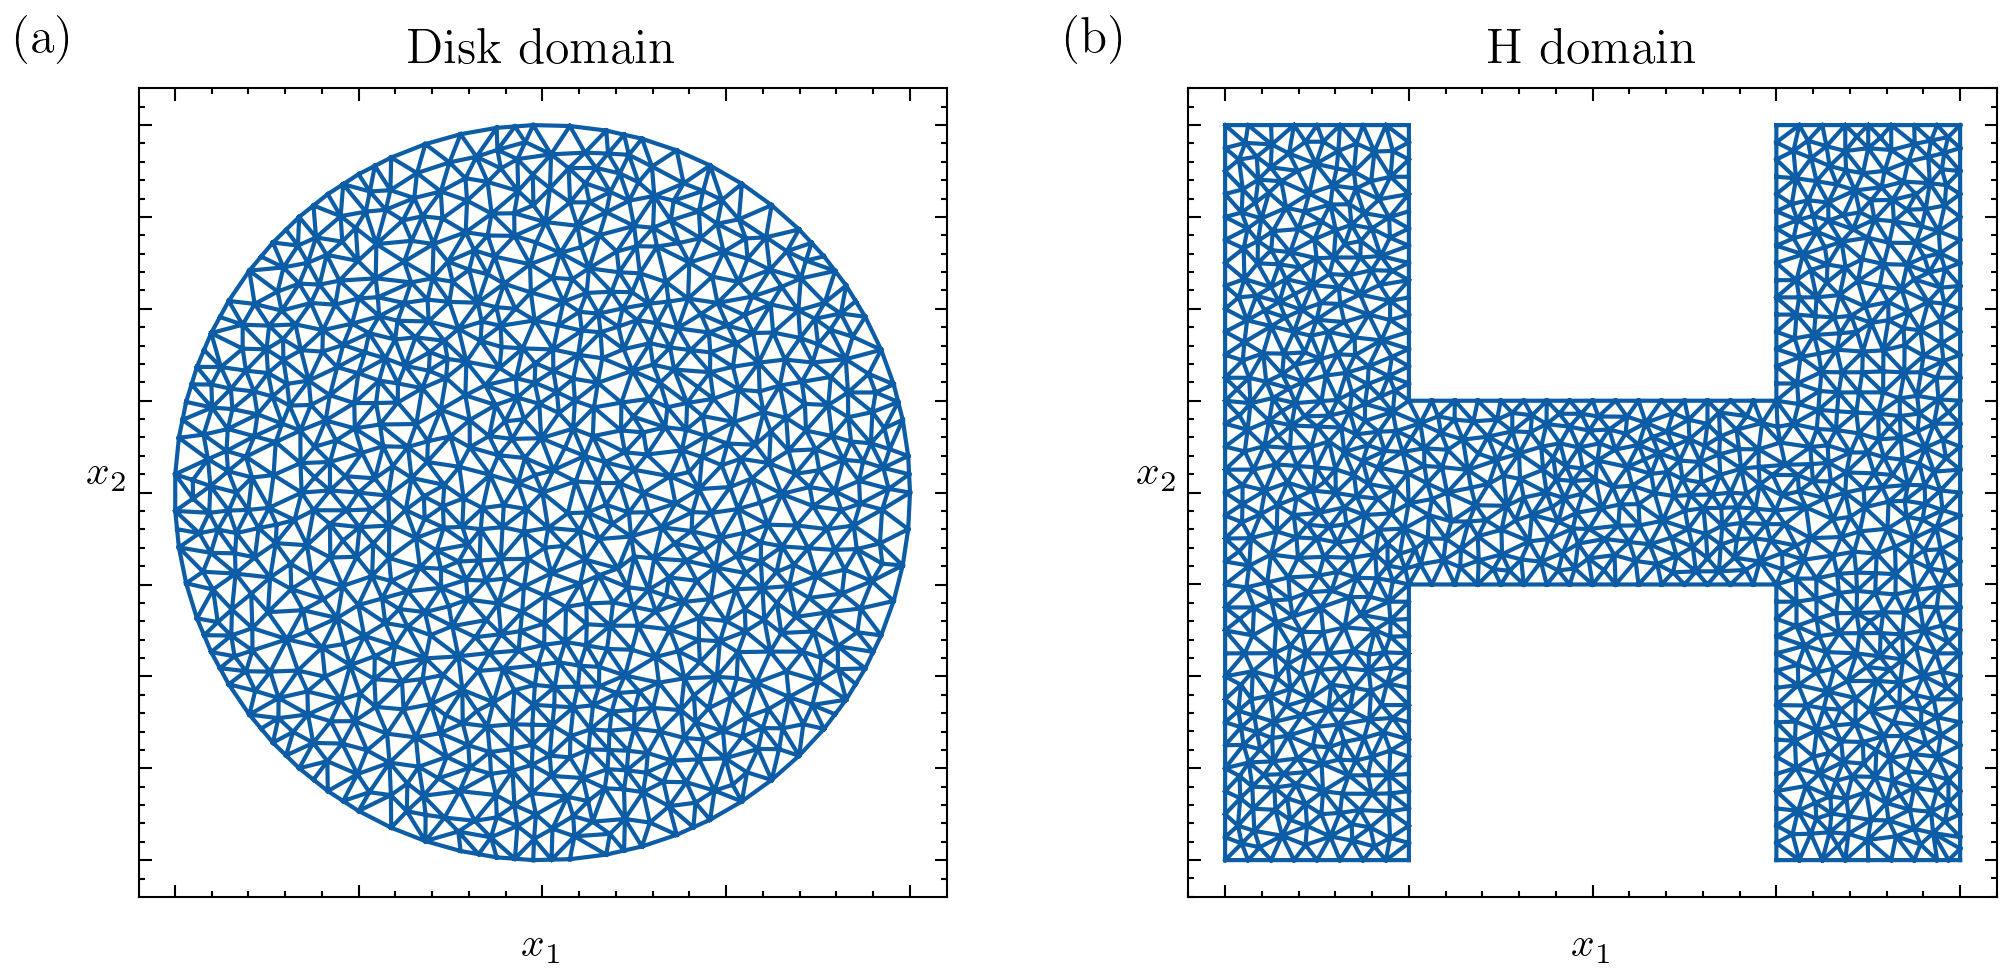

In [21]:
meshdisk_path = os.path.join('../data', 'mesh2D_disk.mat')
ys_disk = scipy.io.loadmat(meshdisk_path)['X']
tris_disk = scipy.io.loadmat(meshdisk_path)['Tri']
triang_disk = tri.Triangulation(ys_disk[:,0],ys_disk[:,1],triangles=tris_disk)

meshh_path = os.path.join('../data', 'mesh2D_h.mat')
ys_h = scipy.io.loadmat(meshh_path)['X']
tris_h = scipy.io.loadmat(meshh_path)['Tri']
triang_h = tri.Triangulation(ys_h[:,0], ys_h[:,1],triangles=tris_h)

cm = 1/2.54
f = plt.figure(figsize=(7,3.5))
subfigs = f.subfigures(1,2).flatten()
ax1 = subfigs[0].subplots()
ax2 = subfigs[1].subplots()

im = ax1.triplot(triang_disk, '-', lw=1)
ax1.set_aspect('equal')
ax1.set_title('Disk domain')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', rotation=0)
ax1.set_xticklabels("")
ax1.set_yticklabels("")
label_a = Text(0.01, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(label_a)

im = ax2.triplot(triang_h, '-', lw=1)
ax2.set_aspect('equal')
ax2.set_title('H domain')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0)
ax2.set_xticklabels("")
ax2.set_yticklabels("")
label_b = Text(0.01, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(label_b)

plt.savefig('mesh2D.pdf')